# Text Tokenization OLID

## Import & Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from collections import Counter
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

c:\Users\walkervalentinus\Documents\PERKULIAHAN\Final_Year\SEMHAS\tasi2425112\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Load Data

In [2]:
clean_df = pd.read_csv("dataset/TwEv/clean.csv")

## Check Label Distribution (Imbalance Analysis)

In [3]:
# Label count
label_counts = clean_df["label"].value_counts().sort_index()
labels = label_counts.index
counts = label_counts.values

In [4]:
# Get majority and minority label
major_label = label_counts.idxmax()
minor_label = label_counts.idxmin()

In [5]:
# Count percentage 
total = counts.sum()
diff_percent = ((counts.max() - counts.min()) / total) * 100

In [6]:
plot_df = pd.DataFrame({
    "Label": labels,
    "Count": counts,
    "Category": ["Major" if l == major_label else "Minor" for l in labels]
})

In [7]:
color_map = {"Major": "blue", "Minor": "red"}

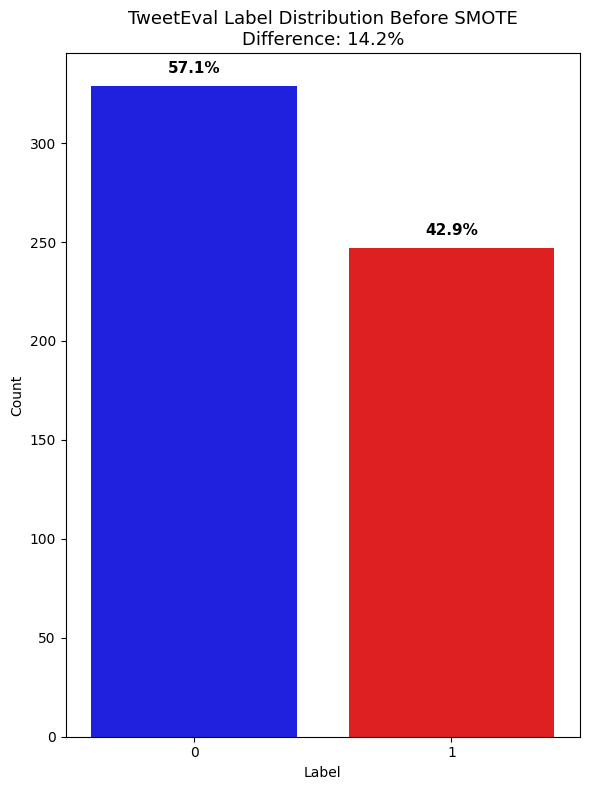

In [8]:
# Plot
plt.figure(figsize=(6, 8))
ax = sns.barplot(data=plot_df, x="Label", y="Count", hue="Category", palette=color_map, dodge=False)
ax.legend_.remove() 

# Add percentage above the bar
for i, count in enumerate(counts):
    pct = (count / total) * 100
    plt.text(i, count + 5, f"{pct:.1f}%", ha='center', va='bottom', fontsize=11, fontweight='bold')

# Title and label
plt.title(f"TweetEval Label Distribution Before SMOTE\nDifference: {diff_percent:.1f}%", fontsize=13)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Tokenization

In [9]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-lite-base-p1")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizerFast'. 
The class this function is called from is 'BertTokenizer'.


In [10]:
def tokenize_column(texts):
    return [tokenizer.encode(text, max_length=128, padding='max_length', truncation=True) for text in texts]

In [11]:
clean_df["token_no_emoji"] = tokenize_column(clean_df["No Stopword Text"].astype(str))
clean_df["token_with_emoji"] = tokenize_column(clean_df["Text with Emoji no Stopword"].astype(str))

In [12]:
clean_df.head(10)

,No Stopword Text,Text with Emoji no Stopword,label,token_no_emoji,token_with_emoji
0,orang wanita sudah sering kamu tidur kata kont...,orang wanita sudah sering kamu tidur kata kont...,1,"[2, 232, 922, 259, 884, 508, 1559, 661, 6971, ...","[2, 232, 922, 259, 884, 508, 1559, 661, 6971, ..."
1,nggak ngejar mantan dasar bohong brengsek udah...,nggak ngejar mantan dasar bohong brengsek udah...,1,"[2, 2118, 22065, 12, 3780, 1205, 13169, 26809,...","[2, 2118, 22065, 12, 3780, 1205, 13169, 26809,..."
2,penasaran apa tempat caitlyn servis mobil,penasaran apa tempat caitlyn servis mobil waja...,0,"[2, 5728, 387, 515, 2256, 47, 27811, 10814, 89...","[2, 5728, 387, 515, 2256, 47, 27811, 10814, 89..."
3,uhhhhhh jalang kecil bodoh bu,uhhhhhh jalang kecil bodoh bu wajah kedip mata,1,"[2, 11099, 22100, 29847, 795, 29843, 855, 7249...","[2, 11099, 22100, 29847, 795, 29843, 855, 7249..."
4,peduli warna kulit cewek dia tetap lacur,peduli warna kulit cewek dia tetap lacur wajah...,1,"[2, 4625, 1321, 1215, 2956, 364, 830, 21838, 5...","[2, 4625, 1321, 1215, 2956, 364, 830, 21838, 5..."
5,factcheck boikotunitedairlines dukung kriminal...,factcheck boikotunitedairlines dukung kriminal...,0,"[2, 2074, 20460, 4132, 2948, 1880, 24243, 1642...","[2, 2074, 20460, 4132, 2948, 1880, 24243, 1642..."
6,kamu tahu cewek cewek bodoh sama kayak kamu ja...,kamu tahu cewek cewek bodoh sama kayak kamu ja...,1,"[2, 508, 899, 2956, 2956, 7249, 500, 5788, 508...","[2, 508, 899, 2956, 2956, 7249, 500, 5788, 508..."
7,cara ucap lacur mata jalang,cara ucap lacur mata jalang hati merah,0,"[2, 354, 6776, 21838, 58, 1163, 795, 29843, 3,...","[2, 354, 6776, 21838, 58, 1163, 795, 29843, 12..."
8,wanita cuma laku satu balik lubang tikus janga...,wanita cuma laku satu balik lubang tikus janga...,1,"[2, 922, 2279, 5427, 282, 2687, 4437, 8973, 84...","[2, 922, 2279, 5427, 282, 2687, 4437, 8973, 84..."
9,jangan pernah coba godain cewek ngelecehin kam...,jangan pernah coba godain cewek ngelecehin kam...,0,"[2, 843, 746, 1841, 8790, 123, 2956, 10293, 16...","[2, 843, 746, 1841, 8790, 123, 2956, 10293, 16..."


## SMOTE Oversampling

In [13]:
X = np.array(clean_df["token_no_emoji"].tolist())
y = clean_df["label"].values

In [14]:
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

## Check Oversampling Result 

In [15]:
print("\nTweetEval Label counts after SMOTE:")
print(Counter(y_resampled))


TweetEval Label counts after SMOTE:
Counter({np.int64(1): 329, np.int64(0): 329})


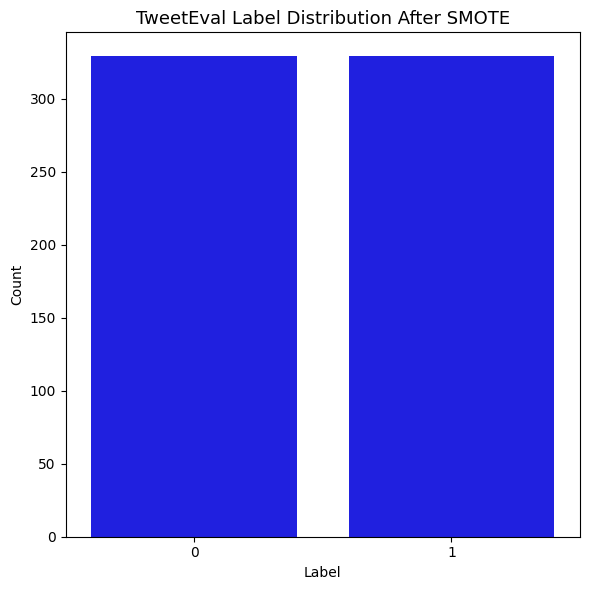

In [16]:
plt.figure(figsize=(6, 6))
sns.barplot(x=list(Counter(y_resampled).keys()), y=list(Counter(y_resampled).values()), color='blue')
plt.title("TweetEval Label Distribution After SMOTE", fontsize=13)
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Save Result

In [17]:
clean_df.to_csv("dataset/TwEv/tokenized_original.csv", index=False)

In [18]:
# Save SMOTE results for token_no_emoji
resampled_df_no_emoji = pd.DataFrame(X_resampled.tolist())
resampled_df_no_emoji['label'] = y_resampled
resampled_df_no_emoji.to_csv("dataset/TwEv/tokenized_smote_no_emoji.csv", index=False)

In [19]:
# Save SMOTE results for token_with_emoji (optional repeat)
X2 = np.array(clean_df["token_with_emoji"].tolist())
X2_resampled, y2_resampled = sm.fit_resample(X2, y)
resampled_df_with_emoji = pd.DataFrame(X2_resampled.tolist())
resampled_df_with_emoji['label'] = y2_resampled
resampled_df_with_emoji.to_csv("dataset/TwEv/tokenized_smote_with_emoji.csv", index=False)

## Train Test Split 

In [20]:
def split_and_save(dataframe, output_dir, name_prefix):
    # Split 80% train, 20% temp
    train_df, temp_df = train_test_split(dataframe, test_size=0.2, stratify=dataframe['label'], random_state=42)

    # Split 10% val, 10% test from temp (50:50 split of 20%)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Save files
    train_df.to_csv(f"{output_dir}/{name_prefix}_train.csv", index=False)
    val_df.to_csv(f"{output_dir}/{name_prefix}_val.csv", index=False)
    test_df.to_csv(f"{output_dir}/{name_prefix}_test.csv", index=False)

In [21]:
df_no_emoji = pd.read_csv("dataset/TwEv/tokenized_smote_no_emoji.csv")
df_with_emoji = pd.read_csv("dataset/TwEv/tokenized_smote_with_emoji.csv")

split_and_save(df_no_emoji, "dataset/TwEv/TTVWE", "no_emoji")
split_and_save(df_with_emoji, "dataset/TwEv/TTVED", "with_emoji")